<a href="https://colab.research.google.com/github/wooihaw/intro2ai/blob/master/Handson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as tf

In [0]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model fitting
history = model.fit(training_images, training_labels, epochs=10, batch_size=64)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1409 - accuracy: 0.9580
Epoch 2/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0446 - accuracy: 0.9862
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0292 - accuracy: 0.9906
Epoch 4/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0199 - accuracy: 0.9936
Epoch 5/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0147 - accuracy: 0.9952
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0108 - accuracy: 0.9964
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0078 - accuracy: 0.9973
Epoch 8/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0079 - accuracy: 0.9973
Epoch 9/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0068 - accuracy: 0.9977
Epo

In [0]:
score = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 167us/sample - loss: 0.0425 - accuracy: 0.9897


In [0]:
print(f'Loss: {score[0]:.4f}, accuracy: {score[1]:.4f}')

Loss: 0.0425, accuracy: 0.9897


In [0]:
n = 911
x = np.expand_dims(test_images[n], axis=0)
classes = model.predict(x)
print(f'Predicted as {classes.argmax()}')

Predicted as 7


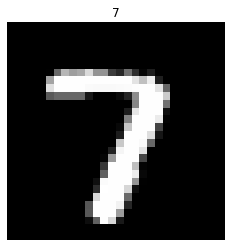

In [0]:
plt.axis(False)
plt.title(test_labels[n])
plt.imshow(test_images[n].reshape(28, 28) * 255, cmap='gray')